In [1]:
import glob
import os
from pathlib import Path
from collections import defaultdict

import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [ ]:
def find_csv_files(log_dir, algos, filename) -> list[Path]:
    # Matches …/<SEED>/debug/**/finetuning_eval.csv  (depth under debug doesn't matter)
    
    csv_files = dict()
    for algo, env_name, exp_log_dir in algos:
        pattern = os.path.join(log_dir, "sarsa_ifql_vib_gpi_offline2offline", exp_log_dir, "*", "debug", "**", filename)
        files = [p for p in glob.glob(pattern, recursive=True)]
        if env_name not in csv_files:
            csv_files[env_name] = {algo: files}
        else:
            csv_files[env_name][algo] = files 
    return csv_files


log_dir = "/n/fs/rl-chongyiz/exp_logs/ogbench_logs"
algos = [
    # latent dimension
    ("d = 64", "walker_flip", "20250523_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    ("d = 128 (Ours)", "walker_flip", "20250523_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("d = 256", "walker_flip", "20250523_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=256_clip_fg=True_hyperparam_ablation"),
    ("d = 512", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    
    ("d = 64", "scene-play-singletask-task1-v0", "20250523_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.2_latent_dim=64_clip_fg=True_hyperparam_ablation"),
    ("d = 128 (Ours)", "scene-play-singletask-task1-v0", "20250523_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True_hyperparam_ablation"),
    ("d = 256", "scene-play-singletask-task1-v0", "20250523_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_vf_time_emb=False_value_ln=True_kl_weight=0.2_latent_dim=256_clip_fg=True_hyperparam_ablation"),
    ("d = 512", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    
    # number of flow steps
    ("T = 1", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=1_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("T = 5", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=5_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("T = 10 (Ours)", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("T = 20", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=20_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    
    ("T = 1", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=1_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("T = 5", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=5_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("T = 10 (Ours)", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("T = 20", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=20_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    
    # number of flow goals
    ("N = 4", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=4_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 8", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=8_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 16 (Ours)", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("N = 32", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=32_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),

    ("N = 4", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=4_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("N = 8", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=8_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("N = 16 (Ours)", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("N = 32", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=32_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),

    # expectile
    ("mu = 0.9 (Ours)", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("mu = 0.95", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.95_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("mu = 0.99", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.99_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    
    ("mu = 0.9", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.9_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("mu = 0.95", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.95_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("mu = 0.99 (Ours)", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    
    # KL weight
    ("lambda = 0.01", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.01_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("lambda = 0.05 (Ours)", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("lambda = 0.1", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.1_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("lambda = 1.0", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=1.0_latent_dim=512_clip_fg=True_hyperparam_ablation"),

    ("lambda = 0.05", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.05_latent_dim=128_clip_fg=True"),
    ("lambda = 0.1", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.1_latent_dim=128_clip_fg=True"),
    ("lambda = 0.2 (Ours)", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("lambda = 1.0", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=1.0_latent_dim=128_clip_fg=True"),
    ("lambda = 2.0", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=2.0_latent_dim=128_clip_fg=True"),

    # BC alpha
    ("alpha = 0.3 (Ours)", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("alpha = 3", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("alpha = 30", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=30_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),
    ("alpha = 300", "walker_flip", "20250522_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=300_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_value_ln=True_kl_weight=0.05_latent_dim=512_clip_fg=True_hyperparam_ablation"),

    ("alpha = 0.3", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("alpha = 3", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=3_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("alpha = 30", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=30_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("alpha = 300 (Ours)", "scene-play-singletask-task1-v0", "20250522_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_num_flow_steps=10_value_ln=True_kl_weight=0.2_latent_dim=128_clip_fg=True"),
]

env_name_maps = {
    'cheetah_run': 'cheetah run',
    'quadruped_jump': 'quadruped jump',
    'walker_walk': 'walker walk',
    'walker_flip': 'walker flip',
    'cube-double-play-singletask-task1-v0': 'cube double task 1',
    'scene-play-singletask-task1-v0': 'scene task 1',
}
algo_name_maps = {
    'sarsa_ifql_vib_gpi_offline2offline': 'InFOM (Ours)',
    'fb_repr_fom_offline2offline': 'FB + FOM',
    'hilp_fom_offline2offline': 'HILP + FOM',
}


csv_files = find_csv_files(log_dir, algos, filename="finetuning_eval.csv")

In [3]:
def load_data(csv_path, stat_name, step_name) -> np.ndarray:
    df = pd.read_csv(csv_path)
    if stat_name not in df.columns:
        raise KeyError(f"{csv_path} doesn't contain {stat_name}")
    x = df[step_name].values
    y = df[stat_name].values
    return dict(x=x, y=y)


algo_data = defaultdict(dict)
for env_name, env_csv_files in csv_files.items():
    for algo, csv_files in env_csv_files.items():
        seed_data = []
        for csv_file in csv_files:
            if 'singletask' in csv_file:
                data = load_data(csv_file, "evaluation/episode.success", "step")
            else:
                data = load_data(csv_file, "evaluation/episode.return", "step")
            if len(seed_data) == 0:
                seed_data.append(data["x"])
            else:
                assert np.all(data["x"] == seed_data[0])
            seed_data.append(data["y"])

        seed_data = np.asarray(seed_data)
        # steps = seed_data[0]
        # data = seed_data[1:]
        
        algo_data[env_name_maps[env_name]][algo] = seed_data
        if len(seed_data) == 1:
            print("Warning: only one random seed!")

In [4]:
print(algo_data['walker flip']['d = 64'][0].shape)
print(algo_data['walker flip']['d = 64'][1:].shape)

print(algo_data['walker flip']['N = 8'][0].shape)
print(algo_data['walker flip']['N = 8'][1:].shape)

print(algo_data['walker flip']['N = 8'][0].shape)
print(algo_data['walker flip']['N = 8'][1:].shape)

print(algo_data['walker flip']['N = 16 (Ours)'][0].shape)
print(algo_data['walker flip']['N = 16 (Ours)'][1:].shape)

print(algo_data['walker flip']['N = 32'][0].shape)
print(algo_data['walker flip']['N = 32'][1:].shape)

(11,)
(4, 11)
(11,)
(4, 11)
(11,)
(4, 11)
(11,)
(4, 11)
(11,)
(3, 11)


In [5]:
for env_name, env_data in algo_data.items():
    for algo, data in env_data.items():
        # x = data[0] - 1e6
        y = data[1:, -3:].mean(axis=-1)
        y_mean = np.mean(y, axis=0)
        # if env_name == 'walker flip':
        #     y_mean = np.mean(y, axis=0) + 50
        # else:
        #     y_mean = np.mean(y, axis=0)
        y_std = np.std(y, axis=0, ddof=1)
        
        print(f"env = {env_name}, {algo}: mean = {y_mean:.4f}, std = {y_std:.4f}")

env = walker flip, d = 64: mean = 342.8535, std = 15.4806
env = walker flip, d = 128 (Ours): mean = 329.4658, std = 5.8840
env = walker flip, d = 256: mean = 312.8380, std = 35.1927
env = walker flip, d = 512: mean = 358.8778, std = 10.3761
env = walker flip, T = 1: mean = 223.1040, std = 50.0624
env = walker flip, T = 5: mean = 245.2005, std = 44.8468
env = walker flip, T = 10 (Ours): mean = 358.8778, std = 10.3761
env = walker flip, T = 20: mean = 302.2869, std = 23.2045
env = walker flip, N = 4: mean = 302.7175, std = 40.9759
env = walker flip, N = 8: mean = 322.2499, std = 24.8461
env = walker flip, N = 16 (Ours): mean = 358.8778, std = 10.3761
env = walker flip, N = 32: mean = 355.1278, std = 20.9662
env = walker flip, mu = 0.9 (Ours): mean = 358.8778, std = 10.3761
env = walker flip, mu = 0.95: mean = 321.1530, std = 24.4146
env = walker flip, mu = 0.99: mean = 307.6597, std = 35.8480
env = walker flip, lambda = 0.01: mean = 249.3299, std = 10.7687
env = walker flip, lambda = 0.0

/tmp/ipykernel_1105724/3992601441.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


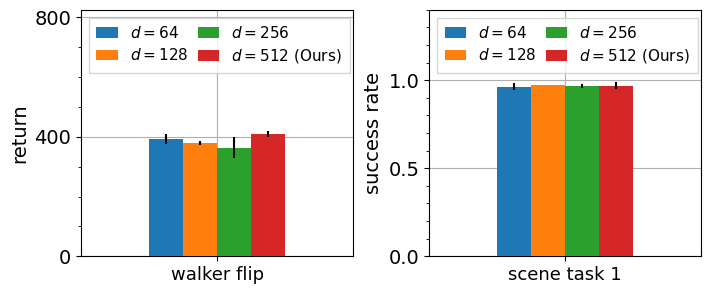

In [51]:
# tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
tasks = ['walker flip', 'scene task 1']

d_64_mean = np.array([392.8535, 0.9633])
d_64_std = np.array([15.4806, 0.0192])
d_128_mean = np.array([379.4658, 0.9733])
d_128_std = np.array([5.8840, 0.0000])
d_256_mean = np.array([362.8380, 0.9700])
d_256_std = np.array([35.1927, 0.0115])
d_512_mean = np.array([408.8778, 0.9700])
d_512_std = np.array([10.3761, 0.0221])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(1)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, d_64_mean[0], yerr=d_64_std[0], width=width, label=r'$d = 64$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, d_128_mean[0], yerr=d_128_std[0], width=width, label=r'$d = 128$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, d_256_mean[0], yerr=d_256_std[0], width=width, label=r'$d = 256$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, d_512_mean[0], yerr=d_512_std[0], width=width, label=r'$d = 512$ (Ours)', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[0]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=0.6,
          borderpad=0.5, handlelength=1.4, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, [tasks[0]], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, d_64_mean[1], yerr=d_64_std[1], width=width, label=r'$d = 64$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, d_128_mean[1], yerr=d_128_std[1], width=width, label=r'$d = 128$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, d_256_mean[1], yerr=d_256_std[1], width=width, label=r'$d = 256$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, d_512_mean[1], yerr=d_512_std[1], width=width, label=r'$d = 512$ (Ours)', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[1]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.4])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=0.6,
          borderpad=0.5, handlelength=1.4, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, [tasks[1]], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_latent_dim.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()

/tmp/ipykernel_1105724/3546122236.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


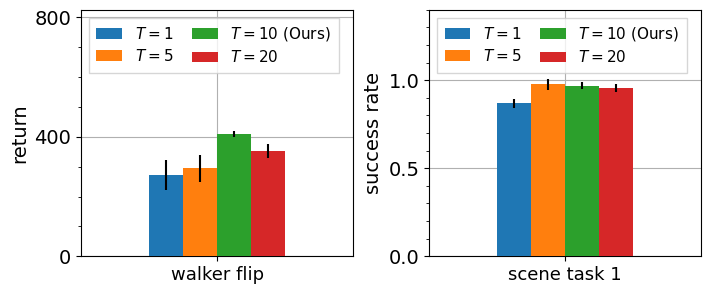

In [52]:
# tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
tasks = ['walker flip', 'scene task 1']

T_1_mean = np.array([273.1040, 0.8700])
T_1_std = np.array([50.0624, 0.0258])
T_5_mean = np.array([295.2005, 0.9767])
T_5_std = np.array([44.8468, 0.0301])
T_10_mean = np.array([408.8778, 0.9700])
T_10_std = np.array([10.3761, 0.0221])
T_20_mean = np.array([352.2869, 0.9567])
T_20_std = np.array([23.2045, 0.0207])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(1)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, T_1_mean[0], yerr=T_1_std[0], width=width, label=r'$T = 1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, T_5_mean[0], yerr=T_5_std[0], width=width, label=r'$T = 5$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, T_10_mean[0], yerr=T_10_std[0], width=width, label=r'$T = 10$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, T_20_mean[0], yerr=T_20_std[0], width=width, label=r'$T = 20$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[0]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, [tasks[0]], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, T_1_mean[1], yerr=T_1_std[1], width=width, label=r'$T = 1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, T_5_mean[1], yerr=T_5_std[1], width=width, label=r'$T = 5$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, T_10_mean[1], yerr=T_10_std[1], width=width, label=r'$T = 10$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, T_20_mean[1], yerr=T_20_std[1], width=width, label=r'$T = 20$', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[1]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.4])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, [tasks[1]], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_num_flow_steps.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()

/tmp/ipykernel_1105724/2044065045.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


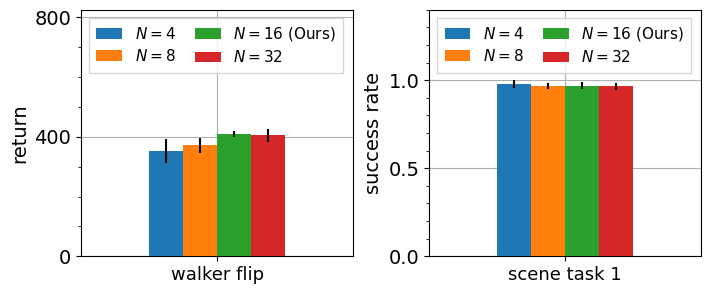

In [53]:
# tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
tasks = ['walker flip', 'scene task 1']

num_flow_goals_4_mean = np.array([352.7175, 0.9800])
num_flow_goals_4_std = np.array([40.9759, 0.0211])
num_flow_goals_8_mean = np.array([372.2499, 0.9683])
num_flow_goals_8_std = np.array([24.8461, 0.0184])
num_flow_goals_16_mean = np.array([408.8778, 0.9700])
num_flow_goals_16_std = np.array([10.3761, 0.0221])
num_flow_goals_32_mean = np.array([405.1278, 0.9650])
num_flow_goals_32_std = np.array([20.9662, 0.0184])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(1)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, num_flow_goals_4_mean[0], yerr=num_flow_goals_4_std[0], width=width, label=r'$N = 4$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, num_flow_goals_8_mean[0], yerr=num_flow_goals_8_std[0], width=width, label=r'$N = 8$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, num_flow_goals_16_mean[0], yerr=num_flow_goals_16_std[0], width=width, label=r'$N = 16$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, num_flow_goals_32_mean[0], yerr=num_flow_goals_32_std[0], width=width, label=r'$N = 32$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[0]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, [tasks[0]], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, num_flow_goals_4_mean[1], yerr=num_flow_goals_4_std[1], width=width, label=r'$N = 4$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, num_flow_goals_8_mean[1], yerr=num_flow_goals_8_std[1], width=width, label=r'$N = 8$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, num_flow_goals_16_mean[1], yerr=num_flow_goals_16_std[1], width=width, label=r'$N = 16$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, num_flow_goals_32_mean[1], yerr=num_flow_goals_32_std[1], width=width, label=r'$N = 32$', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[1]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.4])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.7, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, [tasks[1]], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_num_flow_goals.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()

/tmp/ipykernel_1105724/523005245.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


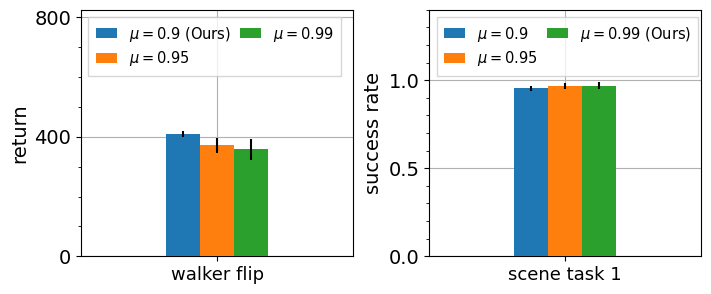

In [54]:
# tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
tasks = ['walker flip', 'scene task 1']

expectile_0_9_mean = np.array([408.8778, 0.9556])
expectile_0_9_std = np.array([10.3761, 0.0139])
expectile_0_95_mean = np.array([371.1530, 0.9683])
expectile_0_95_std = np.array([24.4146, 0.0175])
expectile_0_99_mean = np.array([357.6597, 0.9700])
expectile_0_99_std = np.array([35.8480, 0.0221])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(1)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.0 * width, expectile_0_9_mean[0], yerr=expectile_0_9_std[0], width=width, label=r'$\mu = 0.9$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.0 * width, expectile_0_95_mean[0], yerr=expectile_0_95_std[0], width=width, label=r'$\mu = 0.95$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.0 * width, expectile_0_99_mean[0], yerr=expectile_0_99_std[0], width=width, label=r'$\mu = 0.99$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[0]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=10.5, loc='upper left', labelspacing=0.4, columnspacing=0.65,
          borderpad=0.5, handlelength=1.45, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, [tasks[0]], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.0 * width, expectile_0_9_mean[1], yerr=expectile_0_9_std[1], width=width, label=r'$\mu = 0.9$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.0 * width, expectile_0_95_mean[1], yerr=expectile_0_95_std[1], width=width, label=r'$\mu = 0.95$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.0 * width, expectile_0_99_mean[1], yerr=expectile_0_99_std[1], width=width, label=r'$\mu = 0.99$ (Ours)', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[1]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.4])
ax.legend(fontsize=10.5, loc='upper left', labelspacing=0.4, columnspacing=0.65,
          borderpad=0.5, handlelength=1.45, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, [tasks[1]], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_expectile.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()

/tmp/ipykernel_1105724/1475299454.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


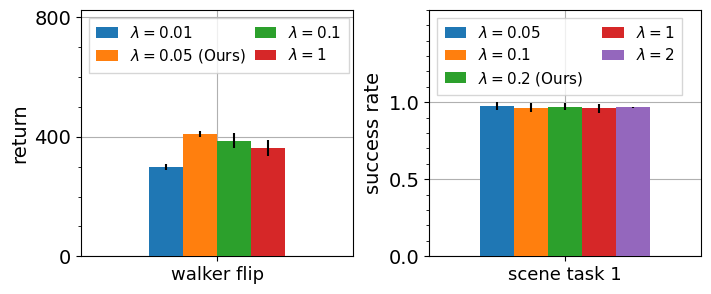

In [55]:
# tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
tasks = ['walker flip', 'scene task 1']

walker_lambda_0_01_mean = 299.3299
walker_lambda_0_01_std = 10.7687
walker_lambda_0_05_mean = 408.8778
walker_lambda_0_05_std = 10.3761
walker_lambda_0_1_mean = 386.1444
walker_lambda_0_1_std = 25.2291
walker_lambda_1_mean = 361.4522
walker_lambda_1_std = 26.3072

scene_lambda_0_05_mean = 0.9750
scene_lambda_0_05_std = 0.0240
scene_lambda_0_1_mean = 0.9633
scene_lambda_0_1_std = 0.0296
scene_lambda_0_2_mean = 0.9700
scene_lambda_0_2_std = 0.0221
scene_lambda_1_mean = 0.9600
scene_lambda_1_std = 0.0313
scene_lambda_2_mean = 0.9667
scene_lambda_2_std = 0.0054

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(1)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, walker_lambda_0_01_mean, yerr=walker_lambda_0_01_std, width=width, label=r'$\lambda = 0.01$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, walker_lambda_0_05_mean, yerr=walker_lambda_0_05_std, width=width, label=r'$\lambda = 0.05$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, walker_lambda_0_1_mean, yerr=walker_lambda_0_1_std, width=width, label=r'$\lambda = 0.1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, walker_lambda_1_mean, yerr=walker_lambda_1_std, width=width, label=r'$\lambda = 1$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[0]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=0.6,
          borderpad=0.5, handlelength=1.4, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, [tasks[0]], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0

ax.bar(x * multiplier - 2 * width, scene_lambda_0_05_mean, yerr=scene_lambda_0_05_std, width=width, label=r'$\lambda = 0.05$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 1 * width, scene_lambda_0_1_mean, yerr=scene_lambda_0_1_std, width=width, label=r'$\lambda = 0.1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0 * width, scene_lambda_0_2_mean, yerr=scene_lambda_0_2_std, width=width, label=r'$\lambda = 0.2$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1 * width, scene_lambda_1_mean, yerr=scene_lambda_1_std, width=width, label=r'$\lambda = 1$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 2 * width, scene_lambda_2_mean, yerr=scene_lambda_2_std, width=width, label=r'$\lambda = 2$', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[1]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.6])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=1.25,
          borderpad=0.5, handlelength=1.4, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, [tasks[1]], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_lambda.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()

/tmp/ipykernel_1105724/2477970065.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)


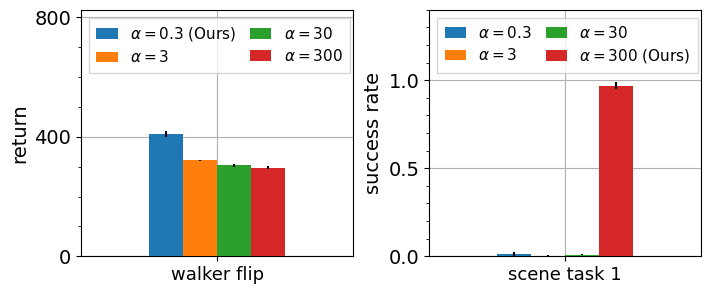

In [ ]:
# tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']
tasks = ['walker flip', 'scene task 1']

alpha_0_3_mean = np.array([408.8778, 0.0128])
alpha_0_3_std = np.array([10.3761, 0.0100])
alpha_3_mean = np.array([321.4267, 0.0017])
alpha_3_std = np.array([2.2232, 0.0033])
alpha_30_mean = np.array([304.8699, 0.0100])
alpha_30_std = np.array([4.4693, 0.0038])
alpha_300_mean = np.array([297.2109, 0.9700])
alpha_300_std = np.array([4.9169, 0.0221])

fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
# fig, axes = plt.subplots(1, 1, figsize=(4.2, 3.2))

x = np.arange(1)
width = 0.05

ax = axes[0]
# ax1 = ax.twinx()

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, alpha_0_3_mean[0], yerr=alpha_0_3_std[0], width=width, label=r'$\alpha = 0.3$ (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, alpha_3_mean[0], yerr=alpha_3_std[0], width=width, label=r'$\alpha = 3$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, alpha_30_mean[0], yerr=alpha_30_std[0], width=width, label=r'$\alpha = 30$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, alpha_300_mean[0], yerr=alpha_300_std[0], width=width, label=r'$\alpha = 300$', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[0]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=0.9,
          borderpad=0.5, handlelength=1.4, ncol=2, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, [tasks[0]], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
# ax1.set_ylim([0.0, 1.025])
# ax1.set_yticks([0.0, 0.5, 1.0])
# ax1.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.5 * width, alpha_0_3_mean[1], yerr=alpha_0_3_std[1], width=width, label=r'$\alpha = 0.3$', capsize=capsize, zorder=3)
ax.bar(x * multiplier - 0.5 * width, alpha_3_mean[1], yerr=alpha_3_std[1], width=width, label=r'$\alpha = 3$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.5 * width, alpha_30_mean[1], yerr=alpha_30_std[1], width=width, label=r'$\alpha = 30$', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.5 * width, alpha_300_mean[1], yerr=alpha_300_std[1], width=width, label=r'$\alpha = 300$ (Ours)', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len([tasks[1]]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.4])
ax.legend(fontsize=11, loc='upper left', labelspacing=0.4, columnspacing=0.9,
          borderpad=0.5, handlelength=1.4, ncol=2, shadow=False, fancybox=False,)
ax.set_xticks(x * multiplier, [tasks[1]], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/hyperparam_ablation_alpha.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()